# MLAG Homework 1 - Univariate Linear Regression

Implememt linear regression with one variable to predict profits for a food truck. Given *ex1data1.txt*, the dataset provided by the food truck company, select which city to expand to next by predicting a test set of profits.

ex1data1.txt is a comma-seperated text file that defines:
    * Population of a city, in the first column
    * Profit of a city, in the second column
    
Notes: With linear regression, we have to consider the 5 requirements to use it:
    * Linear Relationship of the data
    * No multi-colinearity
    * Homoscedasticity
    * Normal distribution
    * No auto-correlation

## Problem Start

### Imports

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [214]:
dataset = pd.read_csv("ex1data1.txt", names=["Population", "Profit"])
dataset.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Separating the X (independent) and Y (dependent) variables

In [234]:
X_matrix = dataset.iloc[:, [0]]
Y_matrix = dataset.iloc[:, [1]]

### Visualization to check linear relationship

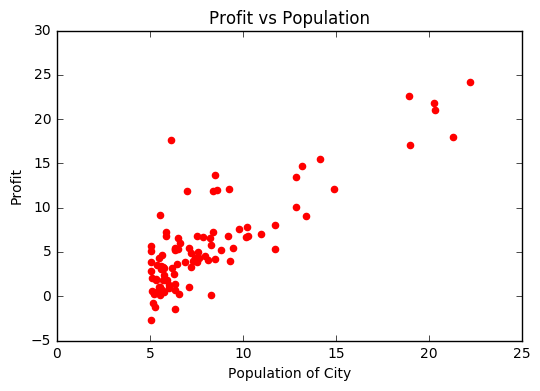

In [216]:
# Plot X_matrix vs Y_matrix to decide if the data has a linear relationship
plt.scatter(X_matrix, Y_matrix, color="red")
plt.xlabel("Population of City") # independent variable
plt.ylabel("Profit") # dependent variable
plt.title("Profit vs Population")
plt.show()

In [217]:
# Get a general idea of the dataset to identify normal distribution, deviation, homoscedasticity
dataset.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Gradient Descent 
The method of finding the parameters that will lead us to a linear best-fit line is gradient descent, a "learning" algorithm used in mathematics to generally minimize functions. The function we want to minimize is the cost function (squared error function), which tells us the error between our proposed hypothesis function and the actual results.

Cost Function:
$$J(θ)= \frac{1}{2m}\sum_{i=1}^m (h(x^i) - y^i)^2$$

Our final gradient descent algorithm will keep changing our parameters based off of the results of the cost function, so that means we need to implement it, as it will be utilized (think: called) multiple times.

In [218]:
# Prerequisite: Convert X_matrix and Y_matrix DataFrame -> ndarray
X_array = X_matrix.values
Y_array = Y_matrix.values

In [219]:
def cost_function(X, Y, theta_parameters):
    ''' m: # of training examples 
        Note: .values does DataFrame -> ndarray '''
    m = dataset.shape[0]
    
    ''' In np.dot, the following are the shapes,
            X_local: (97, 2)
            theta_parameters: (2, 1)
            Result: (97, 1) --> subtract xxby Y_local: (97, 1) '''
    proposed_hypothesis_func = np.dot(X, theta_parameters.T)
    inner_summation = np.power(proposed_hypothesis_func - Y, 2)
    final_cost = inner_summation.sum() / (2 * m)
    return final_cost

### θ.T and 1's Column

In [220]:
''' Array mismatch without 1's column --> (97, 1) dot (2, 1). Add a one's column to X_local (which currently only has
    population) to fix this issue, and allow θ0 to be factored into the cost function. '''
X_matrix.head()

,Population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598


In [221]:
''' After adding a "Filler" column. '''
X_matrix.insert(loc=0, column="Filler", value=1)
X_matrix.head()
X_array = X_matrix.values

In [222]:
Y_matrix.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


### Computing First Solution of the Cost Function

In [224]:
''' Let's compute the result of the cost function at a hypothetical "iteration #1". According to the homework
    instructions, our result should be 32.07 (when rounded to two decimal places). '''
parameters = np.array([[0, 0]])
cost_function(X_array, Y_array, parameters)

32.072733877455676

### Gradient Descent

In [225]:
def gradient_descent(X, Y, theta_parameters, alpha, iterations):
    ''' Keep changing parameters and track cost function results over each iteration '''
    predicted_parameters = np.zeros(theta_parameters.shape) # Separate array needed for simultaneous operations
    cost_tracking_matrix = np.zeros(iterations)
    m = X.shape[0]
    
    # "Repeat until convergence" -> Manually select a number of iterations
    for i in range(iterations):
        inner_derivative_value = (np.dot(X, theta_parameters.T) - Y)
        #print(inner_derivative_value)
        for j in range(len(theta_parameters.ravel())):
            # X[:, [j]] is calculated on a per-parameter basis, use [j] to keep ndarray form (2D)
            complete_inner_value = np.multiply(inner_derivative_value, X[:, [j]])
            predicted_parameters[0][j] = theta_parameters[0][j] - (alpha * ((1/m) * complete_inner_value.sum()))
        
        theta_parameters = predicted_parameters
        cost_tracking_matrix[i] = cost_function(X, Y, theta_parameters)
    
    return theta_parameters, cost_tracking_matrix

## Choosing an α and iterations value 

In [226]:
X = X_array
Y = Y_array
theta_parameters = np.array([[0.0, 0.0]])
alpha = 0.01
iterations = 1000
prediction, costs = gradient_descent(X_array, Y_array, theta_parameters, alpha, iterations)

In [227]:
prediction

array([[-3.24140214,  1.1272942 ]])

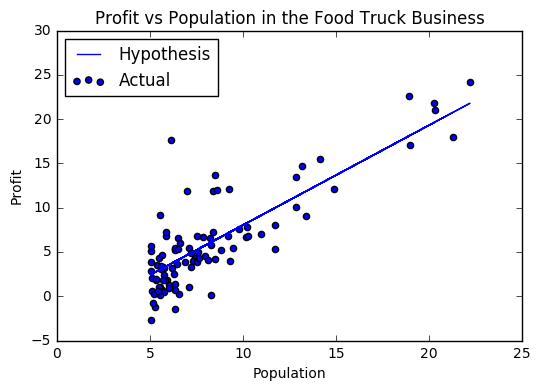

In [228]:
X_population_array = X_array[:, [1]]
hypothesis_function = np.dot(X_array, prediction.T)

plt.scatter(X_population_array, Y_array, label="Actual")
plt.plot(X_population_array, hypothesis_function, label="Hypothesis")
plt.legend(loc=2)
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Profit vs Population in the Food Truck Business")
plt.show()

### Visualizing α effectiveness

Was our α value appropriately leading us to converge the gradient? As we know, we can score this metric of success by visualizing the number of iterations against the cost (unit). The curve should decrease as the iterations increase.

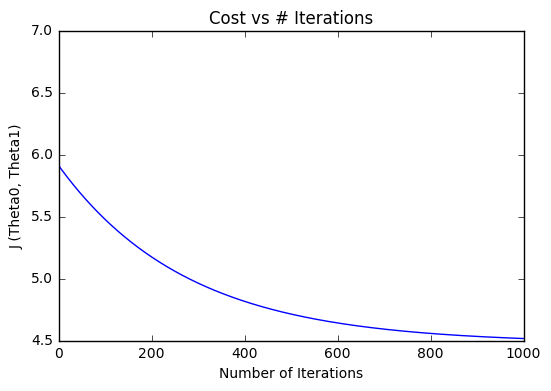

In [229]:
#costs
plt.plot(np.arange(0, costs.size), costs)
plt.xlabel("Number of Iterations")
plt.ylabel("J (Theta0, Theta1)")
plt.title("Cost vs # Iterations")
plt.show()

### Using Scikit-Learn

We came up with our learning algorithm (gradient descent) to choose the best fit line through our data. This implementation from scratch requires a deep understanding of the algorithms that lead to a successful usage of linear regression. However, we can use the API provided by scikit-learn to effectively use linear regression (and other statistical learning techniques) for our datasets, without the math.

In [263]:
from sklearn.linear_model import LinearRegression

In [268]:
X_arr = X_matrix.values
Y_arr = Y_array.copy()

linear_regressor = LinearRegression()
linear_regressor.fit(X_arr, Y_arr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [271]:
# Predicting a population of 10 (unit)
linear_regressor.predict(10)

array([[ 8.03455556]])

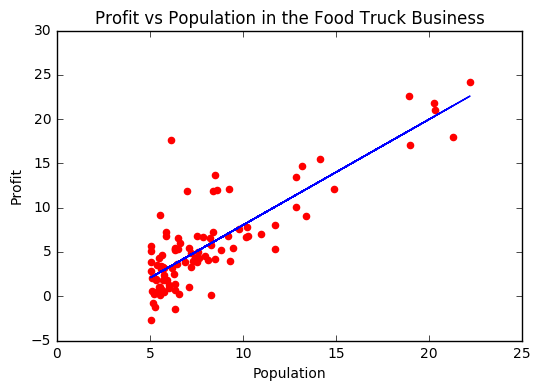

In [273]:
plt.scatter(X_arr, Y_arr, color="red")
plt.plot(X_arr, linear_regressor.predict(X_arr), color="blue")
plt.title("Profit vs Population in the Food Truck Business")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

# MLAG Homework 1 Bonus - Multivariate Linear Regression

Predict the price of a house you are selling given a dataset with information about recent home sales in Portland Oregon. The dataset includes the size (square feet), number of bedrooms, and consequently the price of the house.

In [230]:
new_dataset = pd.read_csv("ex1data2.txt", names=["Size", "Bedrooms", "Price"])

### Add Ones Column

In [231]:
new_dataset.insert(0, "Ones", 1)
new_dataset.head()

,Ones,Size,Bedrooms,Price
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


### Feature Scaling

We have to scale our features so that gradient descent will converge fast (imagine a wide, contour plot against a compressed, circular one). **Note:** It is possible that if using a library like scikit-learn to fit a regressor through the data, feature scaling will already be taken care of for us.

In [232]:
''' Using the "mean normalization" method to feature scale. '''
scaled_dataset = new_dataset.copy()
scaled_dataset.iloc[:, 1:] = (scaled_dataset - scaled_dataset.mean()) / scaled_dataset.std()
scaled_dataset.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


### Seperate the X (independent) and Y (dependent) variables

In [247]:
X_housing_matrix = scaled_dataset.iloc[:, [0, 1, 2]]
X_housing_matrix.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [248]:
Y_housing_matrix = scaled_dataset.iloc[:, [3]]
Y_housing_matrix.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [249]:
X_housing_matrix = X_housing_matrix.values
Y_housing_matrix = Y_housing_matrix.values

### Cost Function with multiple X values

How will the cost function calculation change with multiple independent variables? The answer is simply no. The cost function is able to accomodate however many variables you throw at it because the transforms you do on the X matrix will always lead to the same shape, assuming you are predicting an (x, 1) shaped dependent matrix.

$$repeat \{$$
    $$Theta0 = Theta0 - alpha* d/dTheta0 (J(Th0, Th1, Th2))$$
    $$ ... $$
    $$ ... $$
$$\}$$

In [250]:
# Initial Cost Function
initial_theta = np.array([[0.0, 0.0, 0.0]])
cost_housing = cost_function(X_housing_matrix, Y_housing_matrix, initial_theta)

In [251]:
cost_housing

0.23711340206185572

## Gradient Descent with multiple X values

Gradient Descent adapts to multiple X values by simply introducing the simultaneous change of the corresponding parameters. Since the cost function stays the same, the only parameter-specific calculations involve: 
    * Multiplication of the X values associated with a certain parameter in the derivative step.
    * Subtration from the current value of a parameter when finishing up the whole calculation.

In [253]:
alpha = 0.01
iters = 1000
optimized_parameters, new_cost_matrix = gradient_descent(X_housing_matrix, Y_housing_matrix, initial_theta, alpha, iters)

In [254]:
optimized_parameters

array([[ -1.03203498e-16,   8.78503652e-01,  -4.69166570e-02]])

In [261]:
# Values are decreasing
new_cost_matrix[:100]

array([ 0.23284338,  0.22869419,  0.22466224,  0.22074405,  0.21693624,
        0.21323556,  0.2096388 ,  0.20614291,  0.2027449 ,  0.19944186,
        0.19623098,  0.19310955,  0.19007492,  0.18712453,  0.18425588,
        0.18146658,  0.17875427,  0.1761167 ,  0.17355165,  0.171057  ,
        0.16863068,  0.16627068,  0.16397505,  0.1617419 ,  0.1595694 ,
        0.15745577,  0.15539928,  0.15339828,  0.15145112,  0.14955625,
        0.14771212,  0.14591727,  0.14417026,  0.14246969,  0.1408142 ,
        0.1392025 ,  0.13763331,  0.13610539,  0.13461755,  0.13316863,
        0.1317575 ,  0.13038306,  0.12904427,  0.12774008,  0.12646951,
        0.12523158,  0.12402536,  0.12284993,  0.12170441,  0.12058795,
        0.11949971,  0.11843888,  0.11740468,  0.11639636,  0.11541318,
        0.11445441,  0.11351937,  0.11260739,  0.1117178 ,  0.11084998,
        0.11000331,  0.1091772 ,  0.10837106,  0.10758434,  0.10681648,
        0.10606697,  0.10533528,  0.10462092,  0.1039234 ,  0.10

### Visualizing α effectiveness

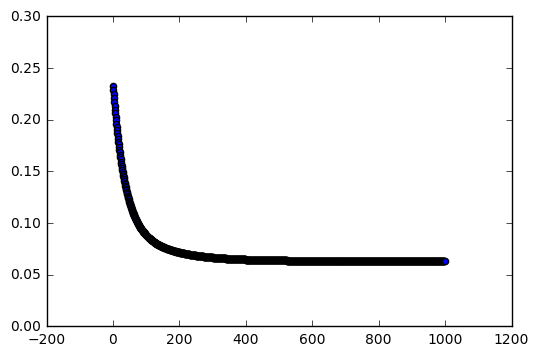

In [262]:
plt.scatter(np.arange(0, new_cost_matrix.size), new_cost_matrix)
plt.show()